# A/B testing
1. Random Permutation Test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
data= pd.read_csv('ab_test.csv')
data.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


step-by-step process of permutation testing
1. Find the amount of data in each group.
2. Calculate test statistic for each test group.
3. Calculate test statistic for each randomize sample of size determined in step 1 for each group.
4. Set significance leval alpha
5. Formulate hypothesis

In [14]:
# Step1: Find the amount of data in each group.
groups= data.groupby('con_treat')['converted'].count().index
sample_size= data.groupby('con_treat')['converted'].count().values
groups, sample_size

(Index(['control', 'treatment'], dtype='object', name='con_treat'),
 array([147202, 147276], dtype=int64))

In [15]:
# Step2: Calculate test statistic for each test group.
orig_test_stat= data.groupby('con_treat')['converted'].mean()
orig_test_stat

con_treat
control      0.120399
treatment    0.118920
Name: converted, dtype: float64

In [22]:
# Step 3: We will take 10000 random sample for both group and calculate the sample mean.
n_sample= 10000
output= {groups[0]: [], groups[1]: []}
for _ in range(n_sample):
    output[groups[0]].append(np.random.choice(data['converted'], sample_size[0]).mean())
    output[groups[1]].append(np.random.choice(data['converted'], sample_size[1]).mean())

final_output= pd.DataFrame(output)

<AxesSubplot:>

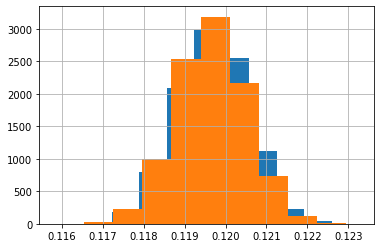

In [23]:
# Visualizing the data
final_output['control'].hist()
final_output['treatment'].hist()

In [26]:
# Step 4
alpha= 0.1

step 5<br>
1. $H_0: \mu_{treatment}- \mu_{control}\leq 0$<br>
2. $H_a: \mu_{treatment}- \mu_{control}> 0$

In [31]:
difference= final_output['treatment']- final_output['control']

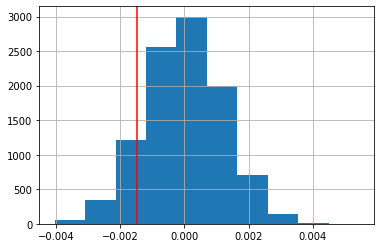

In [32]:
# Visualization of mean difference
difference.hist()
plt.axvline(x= orig_test_stat['treatment']- orig_test_stat['control'], color= 'r')

In [34]:
difference[difference>= orig_test_stat['treatment']- orig_test_stat['control']].count()/ 10000

0.8892

p= 0.882>= 0.1108. Therefore we cannot reject the null hypothesis